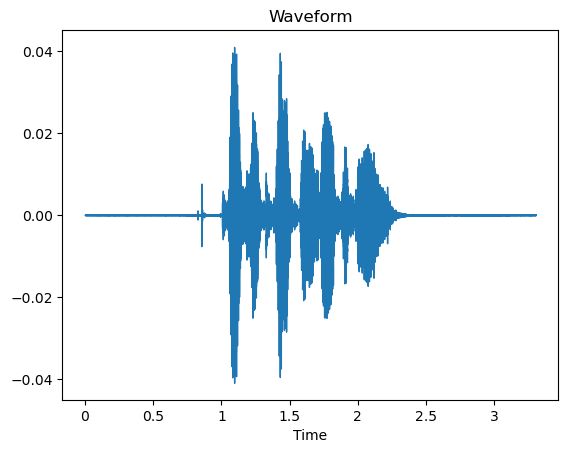

In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load("C:/Users/Sreyas/Desktop/03-01-01-01-01-01-01.wav")

librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.show()


In [4]:
import IPython.display as ipd

print("Original Audio:")
ipd.display(ipd.Audio(y, rate=sr))

Original Audio:


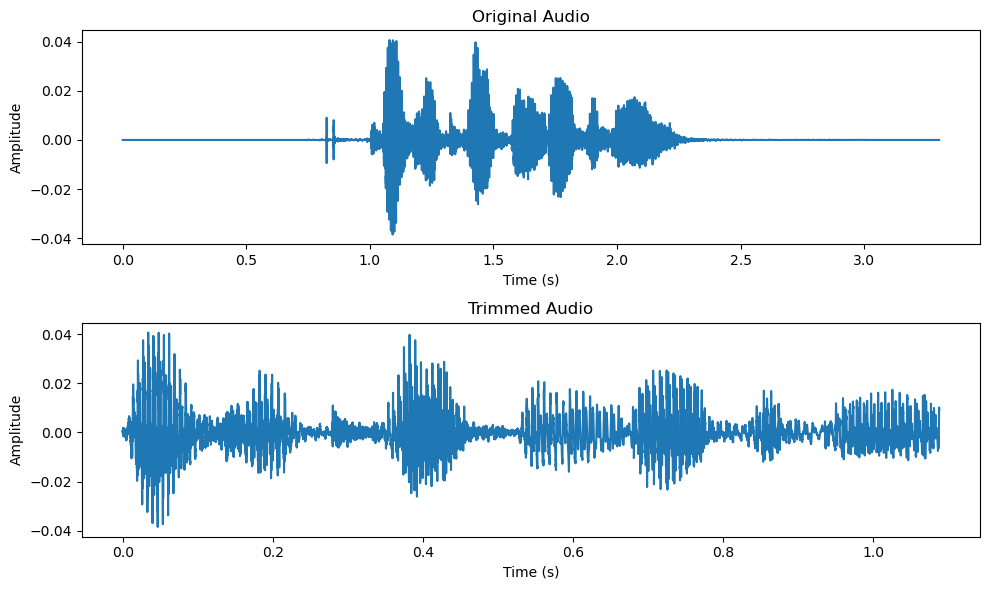

Original Audio:


Trimmed Audio:


In [5]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

original_audio_file = "C:/Users/Sreyas/Desktop/03-01-01-01-01-01-01.wav"
y, sr = librosa.load(original_audio_file, sr=None)

trimmed_y, index = librosa.effects.trim(y, top_db=10)

plt.figure(figsize=(10, 6))


plt.subplot(2, 1, 1)
plt.plot(np.arange(len(y)) / sr, y)
plt.title('Original Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(np.arange(len(trimmed_y)) / sr, trimmed_y)
plt.title('Trimmed Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

print("Original Audio:")
ipd.display(ipd.Audio(y, rate=sr))

print("Trimmed Audio:")
ipd.display(ipd.Audio(trimmed_y, rate=sr))


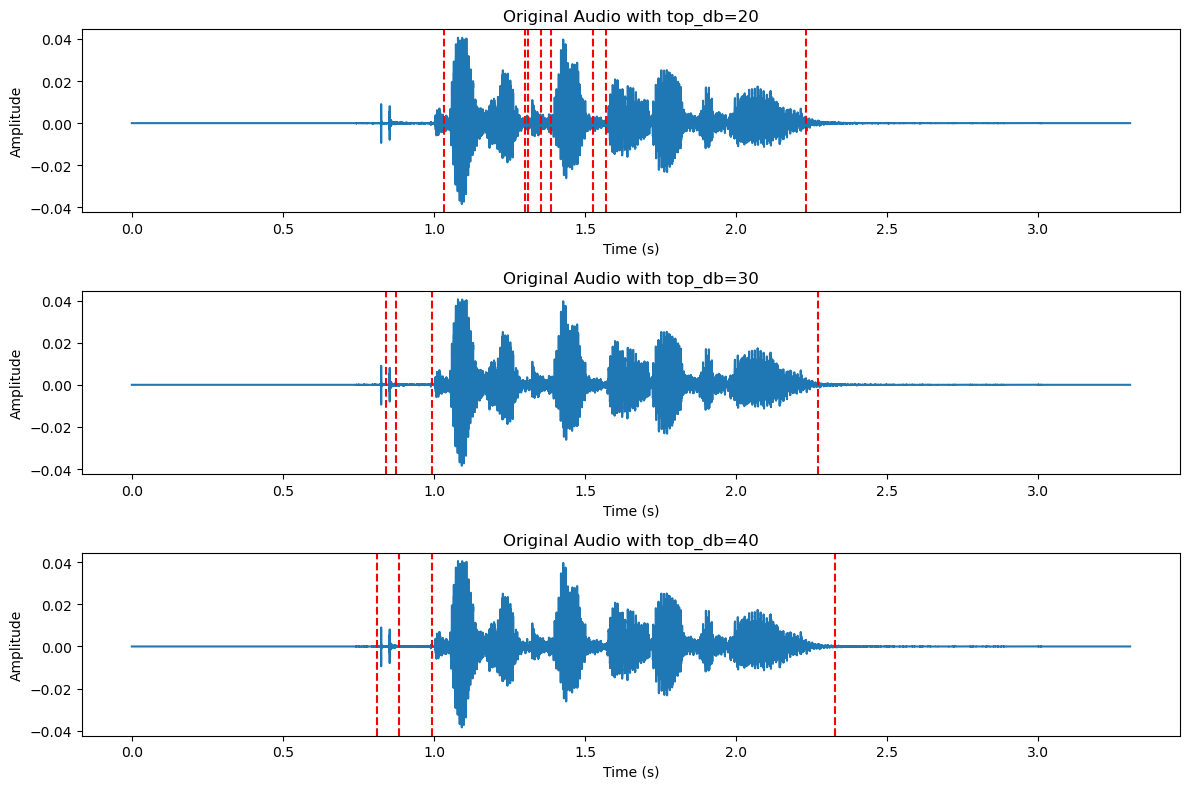

Split Audio with top_db=20:


Split Audio with top_db=30:


Split Audio with top_db=40:


In [20]:
import librosa
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

original_audio_file = "C:/Users/Sreyas/Desktop/03-01-01-01-01-01-01.wav"
y, sr = librosa.load(original_audio_file, sr=None)

top_db_values = [20, 30, 40]  # Experiment with different top_db values

plt.figure(figsize=(12, 8))

for i, top_db in enumerate(top_db_values):
    intervals = librosa.effects.split(y, top_db=top_db)
    plt.subplot(len(top_db_values), 1, i + 1)
    plt.plot(np.arange(len(y)) / sr, y)
    plt.title(f'Original Audio with top_db={top_db}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    for interval in intervals:
        plt.axvline(interval[0] / sr, color='r', linestyle='--')
        plt.axvline(interval[1] / sr, color='r', linestyle='--')

plt.tight_layout()
plt.show()

for i, top_db in enumerate(top_db_values):
    intervals = librosa.effects.split(y, top_db=top_db)
    split_audio = np.concatenate([y[start:end] for start, end in intervals])

    print(f"Split Audio with top_db={top_db}:")
    ipd.display(ipd.Audio(split_audio, rate=sr))


In [11]:
from IPython.display import Audio
Audio(Em_arr,rate = sr)

1102
{5.22391e-10, 3.800551e-10, 1.7030288e-09, 1.4921397e-09, 1.5823753e-06, 1.6995618e-06, 1.6447518e-06, 1.7169112e-06, 2.3682136e-05, 9.471178e-05, 9.796908e-05, 0.00010025129, 0.00010337541, 0.00011703279, 1.2895151e-05, 4.148169e-06, 0.035308708, 3.0088005e-09, 0.057201255, 0.0554217, 0.04093348, 0.04053675, 0.03786074, 2.2107614e-09, 5.1678506e-10, 1.0883791e-17, 9.108562e-18, 2.2670957e-18, 0.0007413122, 0.0036524052, 0.00070173474, 0.0001301989, 0.00012470223, 3.815815e-05, 0.000120459124, 0.00013142638, 0.00015520677, 0.00025922805, 0.0002971515, 0.00034363568, 0.0004663542, 6.557841e-09, 9.660495e-09, 1.6894401e-17, 3.824475e-18, 0.0071924073, 1.7304351e-09, 2.2420305e-17, 4.557643e-18, 2.6364681e-08, 1.0820465e-07, 3.5811378e-11, 1.1516272e-18, 5.98352e-10, 9.7537e-19, 5.429133e-18, 2.0077098e-10, 1.2192916e-10, 2.6786714e-07, 6.350716e-07, 4.7407443e-11, 3.0981967e-17, 6.460727e-18, 0.009288509, 0.006807049, 0.00899287, 0.007966717, 0.0075261192, 0.0040089684, 1.0858137e-0

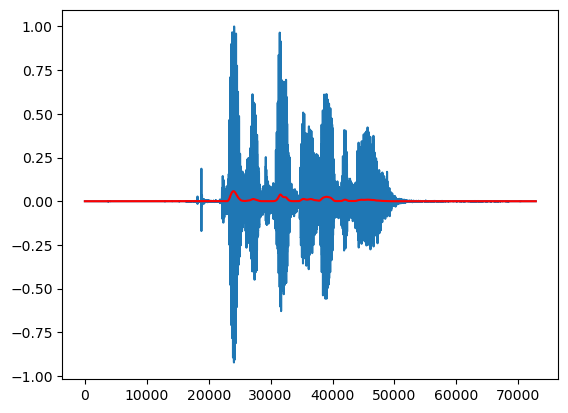

In [18]:
import librosa
import numpy as np
import matplotlib.pyplot as plt 

def calculate_continuous_average_energy(signal, window_size, hop_length):
    energy = np.sum(np.abs(librosa.stft(signal, n_fft=window_size, hop_length=hop_length)) ** 2, axis=0)
    return energy / window_size

def compute_normalized_energy(energy):
    mean_energy = np.mean(energy)
    std_energy = np.std(energy)
    return (energy - mean_energy) / std_energy

def identify_lobes(normalized_energy):
    maxima_indices = librosa.util.peak_pick(normalized_energy, pre_max=5, post_max=5, pre_avg=5, post_avg=5, delta=0, wait=5)
    return maxima_indices

# Example usage
if __name__ == "__main__":
    # Assuming you have loaded the original signal into 'original_signal'
    original_signal, sr = librosa.load(r"C:/Users/Sreyas/Desktop/03-01-01-01-01-01-01.wav")  # Example signal
    window_size = int(0.05 * sr)
    print(window_size)
    hop_length = 1

    # Step 1: Calculate Continuous Average Energy
    continuous_energy = calculate_continuous_average_energy(original_signal, window_size, hop_length)

    # Step 2: Compute Normalized Continuous Average Energy
    normalized_energy = compute_normalized_energy(continuous_energy)

    # Step 3: Identify Maxima and Lobe Boundaries
    maxima_indices = identify_lobes(normalized_energy)
    
    plt.plot(original_signal/np.max(original_signal))
    plt.plot(continuous_energy, 'r')
   

1102


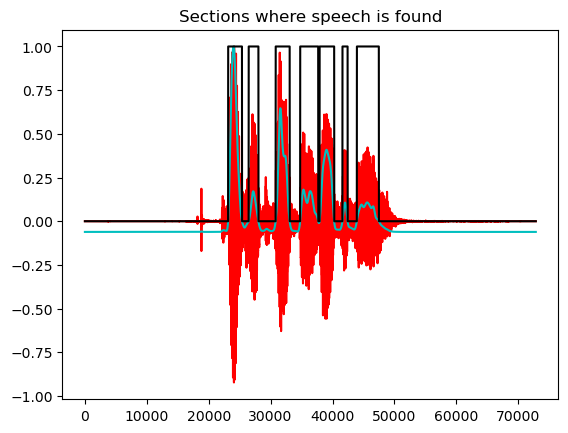

In [31]:
import librosa
import numpy as np
import matplotlib.pyplot as plt 

def calculate_continuous_average_energy(signal, window_size, hop_length):
    energy = np.sum(np.abs(librosa.stft(signal, n_fft=window_size, hop_length=hop_length)) ** 2, axis=0)
    return energy / window_size

def compute_normalized_energy(energy):
    mean_energy = np.mean(energy)
    std_energy = np.std(energy)
    out = (energy - mean_energy) / std_energy
    return out/np.max(out)

def identify_lobes(normalized_energy):
    arr = np.zeros(normalized_energy.shape)
    for i in range(len(normalized_energy)):
        if normalized_energy[i] > 0:
            arr[i] = 1
    return arr

# Example usage
if __name__ == "__main__":
    # Assuming you have loaded the original signal into 'original_signal'
    original_signal, sr = librosa.load(r"C:/Users/Sreyas/Desktop/03-01-01-01-01-01-01.wav")  # Example signal
    window_size = int(0.05 * sr)
    print(window_size)
    hop_length = 1

    # Step 1: Calculate Continuous Average Energy
    continuous_energy = calculate_continuous_average_energy(original_signal, window_size, hop_length)

    # Step 2: Compute Normalized Continuous Average Energy
    normalized_energy = compute_normalized_energy(continuous_energy)

    # Step 3: Identify Maxima and Lobe Boundaries
    maxima_indices = identify_lobes(normalized_energy)

    plt.plot(original_signal/np.max(original_signal),'r')
    plt.plot(normalized_energy, 'c')
    plt.plot(maxima_indices, 'black')
    plt.title("Sections where speech is found")